# BITCOIN ANALYSIS

In [2]:
#Regression Analysis of Bitcoin
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
url = r"C:\Users\Manan\OneDrive\Desktop\Research Paprs\Regression Analysis files\Bitcoin Analysis.xlsx"
df = pd.read_excel(url,index_col = 'Date', parse_dates = True)
df.tail()

,Bitcoin Pricing(USD),3 (month) Treasury Bill Average,M2,Google Trends
Date,,,,
2015-03-01,244.22,0.02,11945.720,3
2015-02-01,254.26,0.03,11821.425,3
2015-01-01,217.46,0.03,11761.950,3
2014-12-01,320.19,0.02,11739.060,3
2014-11-01,378.05,0.02,11595.650,3


In [3]:
df.count()

Bitcoin Pricing(USD)               110
3 (month) Treasury Bill Average    110
M2                                 110
Google Trends                      110
dtype: int64

In [4]:
#Normalising Data 
df['Bitcoin Pricing(USD)'] = (df['Bitcoin Pricing(USD)'] - df['Bitcoin Pricing(USD)'].mean())/(df['Bitcoin Pricing(USD)'].std())
df['M2'] = (df['M2'] - df['M2'].mean())/(df['M2'].std())
df['Google Trends '] = (df['Google Trends '] - df['Google Trends '].mean())/(df['Google Trends '].std())
df['3 (month) Treasury Bill Average'] = (df['3 (month) Treasury Bill Average'] - df['3 (month) Treasury Bill Average'].mean())/(df['3 (month) Treasury Bill Average'].std())
df.head()

,Bitcoin Pricing(USD),3 (month) Treasury Bill Average,M2,Google Trends
Date,,,,
2023-12-01,1.682836,2.481898,1.263938,0.272682
2023-11-01,1.402601,2.526210,1.216924,0.089413
2023-10-01,1.215162,2.513549,1.196986,-0.032766
2023-09-01,0.741181,2.500889,1.205010,-0.216035
2023-08-01,0.677381,2.469237,1.209094,-0.032766


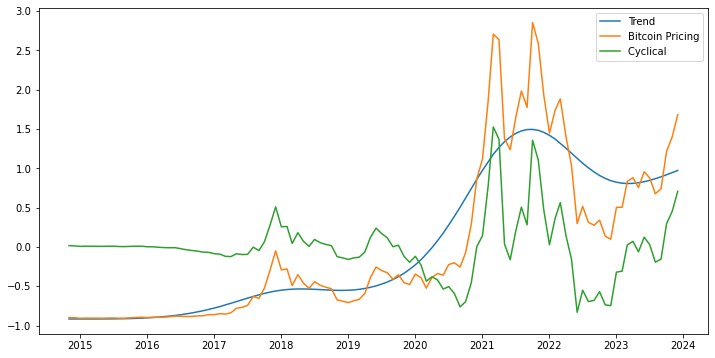

In [5]:
#Performing HP Filter on Bitcoin pricing 
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.filters.hp_filter import hpfilter

# Assuming df['Bitcoin Pricing(USD)'] contains your Bitcoin pricing data
price_cycle, price_trend = hpfilter(df['Bitcoin Pricing(USD)'], lamb=1600)

# Plotting the original Bitcoin pricing and its trend component
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, price_trend, label='Trend')
plt.plot(df.index, df['Bitcoin Pricing(USD)'], label='Bitcoin Pricing')
plt.plot(df.index,price_cycle,label = 'Cyclical ')
plt.legend()
plt.show()


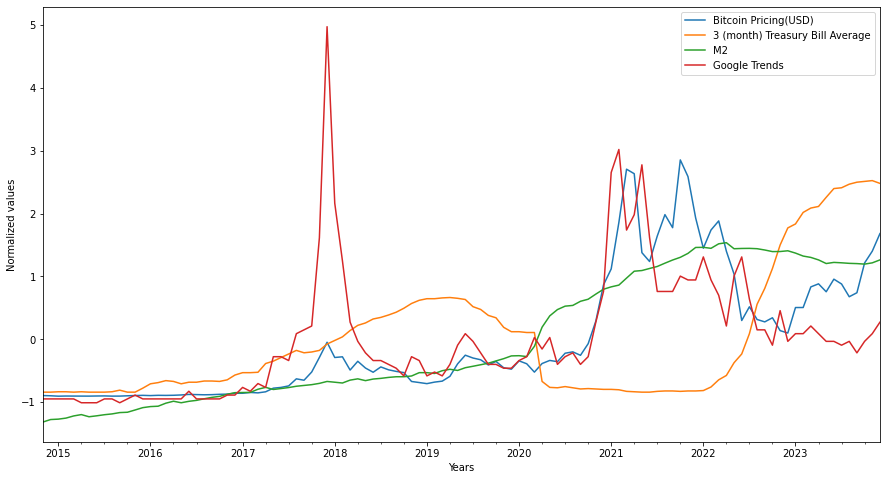

In [6]:
df.plot(figsize = (15,8));
plt.xlabel('Years');
plt.ylabel('Normalized values');

In [7]:
df.describe()

,Bitcoin Pricing(USD),3 (month) Treasury Bill Average,M2,Google Trends
count,1.100000e+02,1.100000e+02,1.100000e+02,1.100000e+02
mean,-1.009294e-17,-6.055762e-17,-7.509145e-16,3.835316e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.054965e-01,-8.415329e-01,-1.317189e+00,-1.010200e+00
25%,-8.512417e-01,-7.908902e-01,-8.337842e-01,-7.658412e-01
50%,-3.877055e-01,-3.794178e-01,-4.649294e-01,-2.160350e-01
75%,6.374523e-01,4.641005e-01,1.203004e+00,2.115921e-01
max,2.855728e+00,2.526210e+00,1.537879e+00,4.976579e+00


In [8]:
df.dtypes

Bitcoin Pricing(USD)               float64
3 (month) Treasury Bill Average    float64
M2                                 float64
Google Trends                      float64
dtype: object

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df[['Bitcoin Pricing(USD)','Google Trends ','M2']].corr()


,Bitcoin Pricing(USD),Google Trends,M2
Bitcoin Pricing(USD),1.000000,0.656783,0.855774
Google Trends,0.656783,1.000000,0.524952
M2,0.855774,0.524952,1.000000


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

lr = LinearRegression()
df.head()
X = df[['Google Trends ','M2','3 (month) Treasury Bill Average']]
Y = df['Bitcoin Pricing(USD)']
a = lr.fit(X,Y)
yhat = lr.predict(X)
print(lr.intercept_)
print(lr.coef_)

8.797590276501655e-16
[ 0.24922263  0.77602184 -0.13186878]


## R Squared 

In [11]:
lr.score(X,Y)

0.8055835602458223

# Testing and splitting with Train Test Split


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # You can adjust test_size as needed

# Fit the model on the training data
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = lr.predict(X_test)

# Calculate R-squared score
r2 = r2_score(Y_test, Y_pred)
print("R-squared score on testing data:", r2)


R-squared score on testing data: 0.4851233754201988


AttributeError: 'Poly3DCollection' object has no attribute '_facecolors2d'

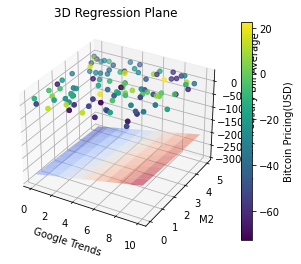

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

data = {
    'Google Trends': np.random.rand(100) * 10,
    'M2': np.random.rand(100) * 5,
    '3 (month) Treasury Bill Average': np.random.rand(100) * 20,
    'Bitcoin Pricing(USD)': 2 * np.random.rand(100) * 10 + 3 * np.random.rand(100) * 5 - 4 * np.random.rand(100) * 20 + np.random.normal(0, 2, 100)
}
df = pd.DataFrame(data)

X = df[['Google Trends', 'M2', '3 (month) Treasury Bill Average']]
Y = df['Bitcoin Pricing(USD)']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['Google Trends'], X['M2'], X['3 (month) Treasury Bill Average'], c=Y, cmap='viridis', label='Data')
lr = LinearRegression()
lr.fit(X, Y)

x1_grid, x2_grid = np.meshgrid(np.linspace(X['Google Trends'].min(), X['Google Trends'].max(), 10), 
                                np.linspace(X['M2'].min(), X['M2'].max(), 10))
x3_grid = (lr.intercept_ - lr.coef_[0] * x1_grid - lr.coef_[1] * x2_grid) / lr.coef_[2]

ax.plot_surface(x1_grid, x2_grid, x3_grid, alpha=0.5, cmap='coolwarm', label='Regression Plane')

ax.set_xlabel('Google Trends')
ax.set_ylabel('M2')
ax.set_zlabel('3 (month) Treasury Bill Average')
ax.set_title('3D Regression Plane')

cbar = plt.colorbar(ax.scatter(X['Google Trends'], X['M2'], X['3 (month) Treasury Bill Average'], c=Y, cmap='viridis'))
cbar.set_label('Bitcoin Pricing(USD)')
plt.legend()
plt.show()
